# Neural Network

## Setup

### Run the Data Preprocessing notebook once to import the get_data method

In [1]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [2]:
%run data_evaluation.ipynb

### Imports

In [3]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
D:\Programms\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programms\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programms\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programms\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: Fu

### Hyperparmeters

In [4]:
# for get_data
handle_missing_values = 'rc'
use_one_hot_encoding = True
split_size = (0.6, 0.2, 0.2)

### Get the data

In [5]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(handle_missing_values, use_one_hot_encoding, split_size)

## Model

### Create the model

In [6]:
classifier = Sequential()

classifier.add(Dense(8, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(8, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 936       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 1,497
Trainable params: 1,497
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [7]:
history = classifier.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=5,
    validation_data=(x_val, y_val)
)

Train on 4874 samples, validate on 1625 samples
Epoch 1/5
4874/4874 [==============================] - 0s 69us/step - loss: 0.5268 - acc: 0.8430 - val_loss: 0.2500 - val_acc: 0.9428
Epoch 2/5
4874/4874 [==============================] - 0s 13us/step - loss: 0.1184 - acc: 0.9721 - val_loss: 0.0487 - val_acc: 0.9852
Epoch 3/5
4874/4874 [==============================] - 0s 13us/step - loss: 0.0246 - acc: 0.9951 - val_loss: 0.0157 - val_acc: 0.9975
Epoch 4/5
4874/4874 [==============================] - 0s 13us/step - loss: 0.0085 - acc: 0.9988 - val_loss: 0.0071 - val_acc: 0.9988
Epoch 5/5
4874/4874 [==============================] - 0s 13us/step - loss: 0.0042 - acc: 0.9996 - val_loss: 0.0038 - val_acc: 1.0000


## Evaluation

### Predict the test set

In [8]:
y_prob = classifier.predict(x_test)
y_pred = np.round(y_prob)

### Apply the evaluation metrics

Precision Score:
1.0

Recall Score:
0.9987146529562982

F1-Score:
0.9993569131832798

Confusion Matrix:

         Ediable Poisonous
Ediable       TN        FP
Poisnous      FN        TP

          Ediable  Poisonous
Ediable       847          0
Poisnous        1        777



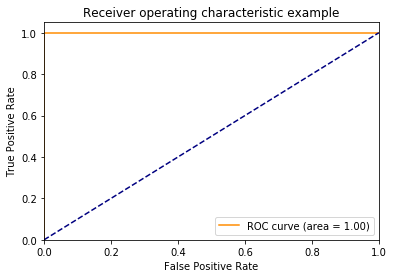


ROC Score:
0.9999984824710229


In [9]:
show_evaluation(y_test, y_pred, y_prob)